TODO

The MSE metric arise from the discretization of the functional L2 norm of the
difference (at least I think so). Hence, it must converge against the analytical
difference of two functions in the limit of fine resolution.

There seems to be an error with th `domain_extent` argument. It must actually be
used in the oppposite.

In [41]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import exponax as ex

In [35]:
DOMAIN_EXTENT = 2.0
grid_1d = ex.make_grid(1, DOMAIN_EXTENT, 1000)

In [36]:
u_0 = jnp.sin(grid_1d)
u_1 = jnp.cos(3 * grid_1d)

In [37]:
ex.metrics.MSE(u_0, u_1, domain_extent=1 / DOMAIN_EXTENT)

Array(2.6859312, dtype=float32)

In [38]:
def get_difference(num_points):
    grid_1d = ex.make_grid(1, DOMAIN_EXTENT, num_points)
    u_0 = jnp.sin(grid_1d)
    u_1 = jnp.cos(3 * grid_1d)

    produced_error = ex.metrics.MSE(u_0, u_1, domain_extent=1 / DOMAIN_EXTENT)
    correct_value = 2.68493

    diff = abs(produced_error - correct_value)

    return diff

In [39]:
num_points_range = 2 ** jnp.arange(3, 14)

In [40]:
error_range = [get_difference(num_points) for num_points in num_points_range]

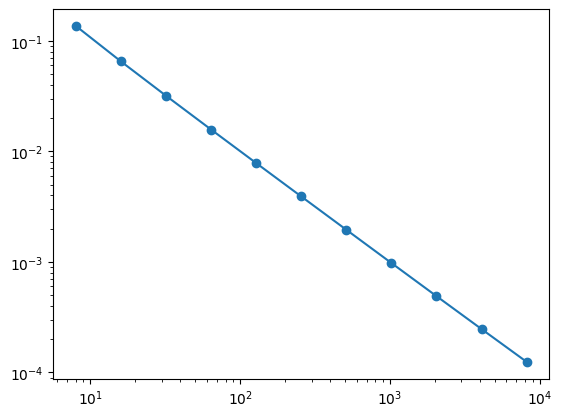

In [42]:
plt.loglog(num_points_range, error_range, "o-")